In [47]:
import pandas as pd

data = {'Weight': [2, 4, 5, 3, 6, 5, 7],
        'Price': [35, 60, 20, 50, 50, 55, 60]}

df = pd.DataFrame(data)
df

,Weight,Price
0,2,35
1,4,60
2,5,20
3,3,50
4,6,50
5,5,55
6,7,60


Task 01

In [48]:
import numpy as np

x = df['Weight']
y = df['Price']

mean_x = np.mean(x)
mean_y = np.mean(y)

dev_x = x - mean_x
dev_y = y - mean_y

m = np.sum(dev_x * dev_y) / np.sum(dev_x**2)
c = (mean_y - m*mean_x)

print(f"Slope (m): {m:.2f}")
print(f"Intercept (c): {c:.2f}")

value = float(input('Enter any value of area: '))
pred_val = m*value + c
print(f"The predicted price for weight {value} is {pred_val:.2f}")

Slope (m): 2.62
Intercept (c): 35.16
Enter any value of area: 6
The predicted price for weight 6.0 is 50.89


Task 02

In [49]:
pred_val = m*x + c
df['Pred. value'] = pred_val
df['Residuals'] = (df['Price'] - df['Pred. value']).abs()
df

,Weight,Price,Pred. value,Residuals
0,2,35,40.40,5.40
1,4,60,45.65,14.35
2,5,20,48.27,28.27
3,3,50,43.02,6.98
4,6,50,50.89,0.89
5,5,55,48.27,6.73
6,7,60,53.51,6.49


Task 03

In [50]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

calculate_MSE = mean_squared_error(df['Price'], df['Pred. value'])
calculate_MAE = mean_absolute_error(df['Price'], df['Pred. value'])

print(f"The Mean squared Error (MSE) is {calculate_MSE: .2f}")
print(f"The Mean Absolute Error is {calculate_MAE: .2f}")

The Mean squared Error (MSE) is  167.31
The Mean Absolute Error is  9.87


Task 04

In [51]:
file_path  = 'Assignment.xlsx'

df.to_excel(file_path, index=False) 

In [62]:
from sklearn.linear_model import LinearRegression 

reg = LinearRegression()
reg.fit(df[['Weight']], y)

reg.coef_
reg.intercept_
reg.predict([[6]])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([50.88709677])

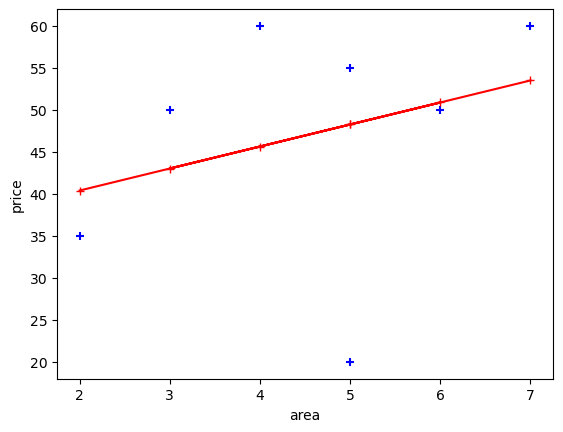

In [66]:
from matplotlib import pyplot as plt

bestfit_point = df.Weight*reg.coef_ + reg.intercept_
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df.Weight, df.Price, color='blue', marker='+')
plt.plot(df.Weight, bestfit_point, color='red', marker='+')